In [1]:
import numpy as np
import matplotlib.pyplot as plt

Пусть дано уравнение $s_{k + 1} = \lambda s_k^2(1 - s_k^2) $ 

Бифуркационная диаграмма $-$ изображение на рисунке смены возможных динамических режимов системы (равновесных состояний, стационарных точек, периодических орбит и пр.) при изменении значения бифуркационного параметра.

Посмотрим симуляцию поведения данного уравнения при разных значениях $\lambda$ 

In [43]:
def function(r, x):
    return r * np.power(x, 2) * (1 - np.power(x, 2))

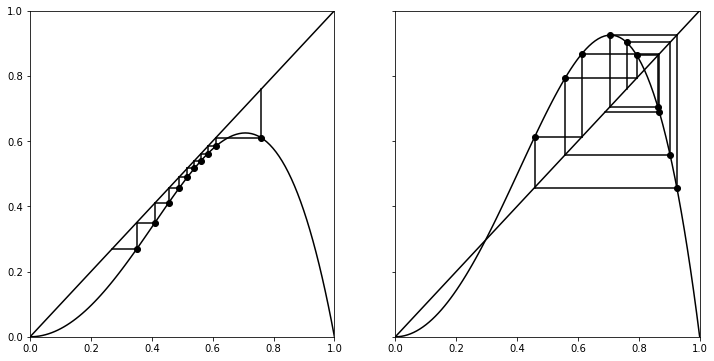

In [63]:
def plot_system(lambd, x0, n, ax = None, lim = 1.0):
    t = np.linspace(0, lim, 100)
    ax.plot(t, function(lambd, t), 'k')
    ax.plot([0, lim], [0, lim], 'k')
    x = x0
    
    for time_ in range(n):
        y = function(lambd, x)
        ax.plot([x, x], [x, y], 'k')
        ax.plot([x, y], [y, y], 'k')
        ax.plot([x], [y], 'ok')
        x = y

    ax.set_xlim(0, lim)
    ax.set_ylim(0, lim)
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 6), sharey = True)

plot_system(2.5, 0.76, 10, ax = ax1)
plot_system(3.7, 0.76, 10, ax = ax2)

Теперь будем варьировать $\lambda$, чтобы получить параметрическое множество $\{s_k, \lambda \}$

Text(0.5, 1.0, 'Бифуркационная диаграмма')

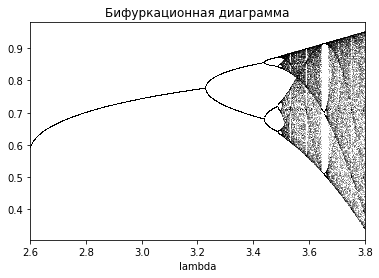

In [145]:
n = 1000
from_  = 2.6; to_ = 3.8
X, Y = [], []
s0 = 0.66
for lambd in np.linspace(from_, to_, n):
    s = s0
    for k in range(n):
        s = function(lambd, s)
        if k > 900:
            X.append(lambd)
            Y.append(s)
        
        
plt.plot(X, Y, marker = ",", ls  = '', color = 'k', alpha=.25)
plt.xlim(2.6, 3.8)
plt.xlabel("lambda")
plt.title("Бифуркационная диаграмма")

Посмотрим на показатель Ляпунова системы.  **Показатель Ляпунова динамической системы** — *величина, характеризующая скорость удаления друг от друга траекторий*. Положительность показателя Ляпунова обычно свидетельствует о хаотическом поведении системы, according to Wikipedia

\begin{align}
\Lambda(\lambda) = \lim_{n \rightarrow \infty} \frac{1}{n} \sum_{i = 0}^{n - 1} log |\frac{ds_{\lambda}}{dx}(x_i^{(\lambda)})| \\
\frac{ds_{\lambda}}{dx} = 2 \lambda x (1 -2 x^2)
\end{align}

Всё, на самом деле, хорошо, пока $\lambda < 3.2$

/home/al_cher/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


Text(0.5, 1.0, 'Показатель Ляпунова')

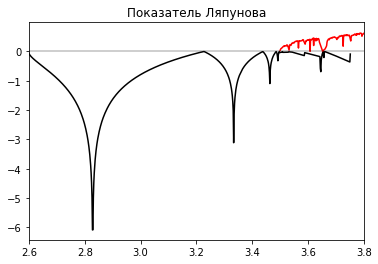

In [146]:
n_iterations = 1000
Lambd = np.zeros(n)
s = s0 * np.ones(n)
lambd = np.linspace(2.4, 4.0, n)

for iter_ in range(n_iterations):
    s = function(lambd, s)
    Lambd += np.log( abs(2 * lambd * s *(1 - 2 * np.power(s, 2))) )
    
plt.plot(lambd[Lambd < 0],
         Lambd[Lambd < 0] / n_iterations, 'k')
plt.plot(lambd[Lambd >= 0],
         Lambd[Lambd >= 0] / n_iterations, 'r') 
plt.axhline(0, color = 'k', alpha = .25)
plt.xlim(2.6, 3.8)
plt.title("Показатель Ляпунова")